# Ряд Тейлора для синуса

In [1]:
import math

In [2]:
def mysin(x,n = -1):
    if (n < 0):
        res = x
        delta = x
        i = 1
        while (abs(delta) > 0):
            i+=1
            delta*=-(x*x)/(2*(i-1)*(2*(i-1)+1))
            res+=delta
        return res, i
    else:
        buff = x
        def el(N):
            nonlocal buff
            if (N != 1):
                buff *= -(x*x)/(2*(N-1)*(2*(N-1)+1))
            return buff
        return sum(map(el, range(1,n)))

# Проверка

In [3]:
x1 = math.pi/2
x2 = 11 * math.pi/2
x3 = 21 * math.pi/2
x4 = 31 * math.pi/2

In [4]:
print("x1:", x1)
print("x2:", x2)
print("x3:", x3)
print("x4:", x4)

x1: 1.5707963267948966
x2: 17.27875959474386
x3: 32.98672286269283
x4: 48.69468613064179


## Синус

In [5]:
mysin_x1 = mysin(x1)
mysin_x2 = mysin(x2)
mysin_x3 = mysin(x3)
mysin_x4 = mysin(x4)

In [6]:
print("x1:", mysin_x1[0])
print("x2:", mysin_x2[0])
print("x3:", mysin_x3[0])
print("x4:", mysin_x4[0])

x1: 1.0000000000000002
x2: -1.0000000002128728
x3: 0.9998667640418495
x4: -5822.01852702401


## Графики

In [7]:
import matplotlib.pyplot as plot

In [8]:
def mysin_acc_plot(x):
    ns = range(1,mysin(x)[1])
    deltas = list(map(lambda N: math.sin(x) - mysin(x,N), ns))
    plot.plot(ns, deltas)
    plot.show()

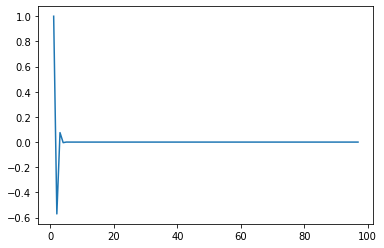

In [9]:
mysin_acc_plot(x1)

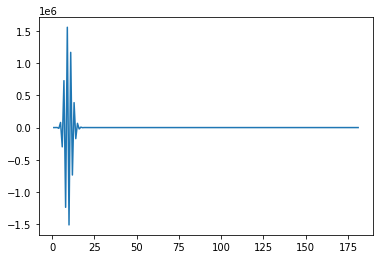

In [10]:
mysin_acc_plot(x2)

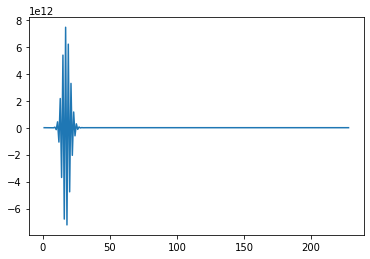

In [11]:
mysin_acc_plot(x3)

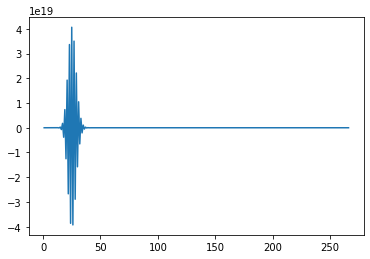

In [12]:
mysin_acc_plot(x4)

## Точность

In [13]:
print("x1:",abs(math.sin(x1) - mysin_x1[0]),"n=", mysin_x1[1])
print("x2:",abs(math.sin(x2) - mysin_x2[0]),"n=", mysin_x2[1])
print("x3:",abs(math.sin(x3) - mysin_x3[0]),"n=", mysin_x3[1])
print("x4:",abs(math.sin(x4) - mysin_x4[0]),"n=", mysin_x4[1])

x1: 2.220446049250313e-16 n= 98
x2: 2.1287283047399796e-10 n= 182
x3: 0.0001332359581505127 n= 229
x4: 5821.01852702401 n= 267


## Максимальный по абсолютному значению член

In [14]:
def mysin_max_el(x):
    results = [mysin(x,i) for i in range(mysin(x)[1])]
    return max([abs(results[i]-results[i+1]) for i in range(len(results)-1)])

In [15]:
print("x1:",mysin_max_el(x1))
print("x2:",mysin_max_el(x2))
print("x3:",mysin_max_el(x3))
print("x4:",mysin_max_el(x4))

x1: 1.5707963267948966
x2: 3066514.6373838116
x3: 14672596728254.967
x4: 7.988994169819993e+19


# Вывод

При возрастании x, уменьшается точность из-за ограничения в точности вычислений типа float.

Для больших x(например: x4) происходит переполнение типа float раньше, чем ряд начинает сходиться, из-за чего ответ выходит неверным.